In [3]:
# Martha Dunne
# C:\Users\mabdu\Practicum1a.ipynb
# anaconda Navigator
# jupyter notebook
# python 3.8
# pandas 0.25.1
# numpy 1.16.5
# matplotlib 3.1.1
# seaborn 0.9.0
# 
##### Practicum_Asides.ipynb
#####   Aside investigations 
#####      Zscores
#####      Scaling
#####
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
# from datetime import datetime, timedelta
# from sklearn.linear_model import LinearRegression

## Read merged and cleaned file of two datasets
###     1 - Covid-19 John Hopkins dataset
###     2 - Google mobility data
### Merged data starts 2020-02-20, current day delayed several days due to mobility data processing

In [4]:
# Using the merged file from Practicum_Clean_Merge.ipynb
# Merge of two datasets
#  1- John hopkins dataset which updates daily
#  2- google cellphone mobility data which updates daily but is 3 to 4 days delayed due to processing
dfmrg = pd.read_csv("PracticumMergedData.csv")


## Test Zscore Removing An outlier of a normally distributed dataset is defined as a value 
## that is more than 3 standard deviations from the mean.

In [5]:
#http://www.cs.uni.edu/~campbell/stat/normfact.html
#select all rows where the values of a certain column are within 3 standard deviations from mean
#68-95 rule
#It is readily calculated that 68% (.6826) of normally distributed data is within 
#one standard deviation of the mean (between -1 and 1). 
#Similarly, 95% (.9544) is within two standard deviation units of the mean, 
#and 99.7% (.9974) is within three standard deviation units of the mean.
## Removing An outlier of a normally distributed dataset is defined as a value 
# that is more than 3 standard deviations from the mean.
from scipy import stats
#dfmrg = dfmrg[(np.abs(stats.zscore(dfmrg.drop(['date','country_region'], axis=1))) < 3).all(axis=1)]
dfmrgZ = dfmrg[
((stats.zscore(dfmrg.drop(['date','country_region'], axis=1)) < 3) & (stats.zscore(dfmrg.drop(['date','country_region'], axis=1)) > -3)).all(axis=1)]
dfmrgZ.shape

#dfmrgZ = dfmrg[(np.abs(stats.zscore(dfmrg.drop(['date','country_region'], axis=1)) < 3) ).all(axis=1)]
#dfmrgZ.shape

(20709, 12)

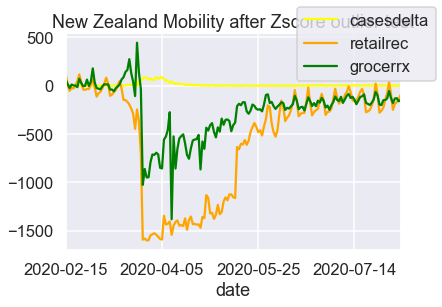

In [6]:
ax = plt.gca()
plt.title('New Zealand Mobility after Zscore outlier test')
dfmrgZ[dfmrgZ.country_region.str.contains('New Zealand',case=True)].plot(kind='line',x='date',y='casesdelta',color='yellow',ax=ax)
dfmrgZ[dfmrgZ.country_region.str.contains('New Zealand',case=True)].plot(kind='line',x='date',y='retailrec', color='orange', ax=ax)
dfmrgZ[dfmrgZ.country_region.str.contains('New Zealand',case=True)].plot(kind='line',x='date',y='grocerrx', color='green', ax=ax)
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

In [7]:
# Per mobility documentation too many variables between countries
#dfmrg.corr('pearson')
#dfmrgZ.corr('pearson')

In [8]:
# New Zealand Strong GOOD Covid-19 response country
# see potential moderate strength negative correlation where casesdelta between 0.5 and 0.75
# retailrx, grocerrx, work
# Will train regression model with New Zealand.
dfmrg[dfmrg.country_region.str.contains('New Zealand',case=True)].corr('pearson')

,cases,deaths,casesdelta,deathsdelta,retailrec,grocerrx,transit,work,parks,reside
cases,1.000000,0.906220,-0.200681,0.109621,-0.220860,-0.334767,-0.477768,-0.246667,-0.476102,0.308201
deaths,0.906220,1.000000,-0.477997,-0.048444,0.112228,-0.012196,-0.160824,0.108106,-0.158220,0.002963
casesdelta,-0.200681,-0.477997,1.000000,0.067127,-0.602708,-0.611807,-0.496126,-0.624131,-0.524770,0.542442
deathsdelta,0.109621,-0.048444,0.067127,1.000000,-0.393115,-0.336732,-0.372082,-0.401059,-0.360757,0.379354
retailrec,-0.220860,0.112228,-0.602708,-0.393115,1.000000,0.881860,0.921948,0.908696,0.859854,-0.885306
grocerrx,-0.334767,-0.012196,-0.611807,-0.336732,0.881860,1.000000,0.825164,0.836316,0.814520,-0.745286
transit,-0.477768,-0.160824,-0.496126,-0.372082,0.921948,0.825164,1.000000,0.903818,0.921727,-0.913525
work,-0.246667,0.108106,-0.624131,-0.401059,0.908696,0.836316,0.903818,1.000000,0.816454,-0.901260
parks,-0.476102,-0.158220,-0.524770,-0.360757,0.859854,0.814520,0.921727,0.816454,1.000000,-0.836210
reside,0.308201,0.002963,0.542442,0.379354,-0.885306,-0.745286,-0.913525,-0.901260,-0.836210,1.000000


In [9]:
# IGNORE, no difference, perhaps my zscore is bad
dfmrgZ[dfmrgZ.country_region.str.contains('New Zealand',case=True)].corr('pearson')

,cases,deaths,casesdelta,deathsdelta,retailrec,grocerrx,transit,work,parks,reside
cases,1.000000,0.906220,-0.200681,0.109621,-0.220860,-0.334767,-0.477768,-0.246667,-0.476102,0.308201
deaths,0.906220,1.000000,-0.477997,-0.048444,0.112228,-0.012196,-0.160824,0.108106,-0.158220,0.002963
casesdelta,-0.200681,-0.477997,1.000000,0.067127,-0.602708,-0.611807,-0.496126,-0.624131,-0.524770,0.542442
deathsdelta,0.109621,-0.048444,0.067127,1.000000,-0.393115,-0.336732,-0.372082,-0.401059,-0.360757,0.379354
retailrec,-0.220860,0.112228,-0.602708,-0.393115,1.000000,0.881860,0.921948,0.908696,0.859854,-0.885306
grocerrx,-0.334767,-0.012196,-0.611807,-0.336732,0.881860,1.000000,0.825164,0.836316,0.814520,-0.745286
transit,-0.477768,-0.160824,-0.496126,-0.372082,0.921948,0.825164,1.000000,0.903818,0.921727,-0.913525
work,-0.246667,0.108106,-0.624131,-0.401059,0.908696,0.836316,0.903818,1.000000,0.816454,-0.901260
parks,-0.476102,-0.158220,-0.524770,-0.360757,0.859854,0.814520,0.921727,0.816454,1.000000,-0.836210
reside,0.308201,0.002963,0.542442,0.379354,-0.885306,-0.745286,-0.913525,-0.901260,-0.836210,1.000000


### Scaling experiment

In [11]:
# Experiment with SCALING and correlation
#https://benalexkeen.com/feature-scaling-with-scikit-learn/
# preprocessing module to scale data scikit-learn:
# StandardScaler, MinMaxScaler, RobustScaler, Normalizer
# StandardScaler. assumes your data is normally distributed within each feature
# MinMaxScaler. sensitive to outliers, use if distribution is not Gaussian or the standard deviation is very small
# RobustScaler. use if have outliers
# Normalizer.
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
scaler = preprocessing.RobustScaler()

In [12]:
df7 = dfmrg[dfmrg.country_region.str.contains('New Zealand',case=True)]

In [13]:
df8 = df7[['casesdelta','grocerrx']]

In [14]:
#https://benalexkeen.com/feature-scaling-with-scikit-learn/
robust_scaled_df = scaler.fit_transform(df8)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['casesdelta', 'grocerrx'])

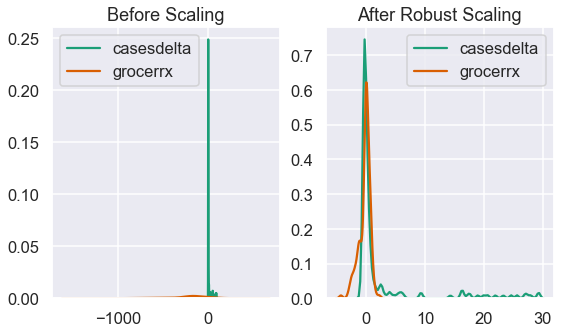

In [15]:
#https://benalexkeen.com/feature-scaling-with-scikit-learn/
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df8['casesdelta'], ax=ax1)
sns.kdeplot(df8['grocerrx'], ax=ax1)
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['casesdelta'], ax=ax2)
sns.kdeplot(robust_scaled_df['grocerrx'], ax=ax2)
plt.show()

In [16]:
df8.corr('pearson')

,casesdelta,grocerrx
casesdelta,1.000000,-0.611807
grocerrx,-0.611807,1.000000


In [17]:
robust_scaled_df.corr('pearson')

,casesdelta,grocerrx
casesdelta,1.000000,-0.611807
grocerrx,-0.611807,1.000000


In [ ]:
###
### Fix spiky data MOVING AVERAGE DATA
#dfusretl = dfus[['date','retail_and_recreation_percent_change_from_baseline']]
#dfusretl
# dfusretl date needs to be an index column for rolling() to pass date
#dfusretl.set_index(dfusretl[("date")],inplace=True)
#dfusretl.info()
## Moving Average
#https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/
#my_year_month_fmt = mdates.DateFormatter('%m/%y')
#start_date = '2020-02-15'
#end_date = '2020-07-21'
# creates Series
#short_rolling = dfusretl.retail_and_recreation_percent_change_from_baseline.rolling(window=10).mean()
#long_rolling = dfusretl.retail_and_recreation_percent_change_from_baseline.rolling(window=30).mean()
#ema_short = dfusretl.retail_and_recreation_percent_change_from_baseline.ewm(span=20, adjust=False).mean()
#Smoothed like this
#long_rolling.plot()
#fig, ax = plt.subplots(figsize=(16,9))
#ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'retail_and_recreation_percent_change_from_baseline'], label = '30-days SMA')
#ax.legend(loc='best')
#ax.set_ylabel('% change from base')
#ax.xaxis.set_major_formatter(my_year_month_fmt)
#
#ax.plot(dfusretl.loc[start_date:end_date, :].index, dfusretl.loc[start_date:end_date, 'retail_and_recreation_percent_change_from_baseline'])
#ax.plot(dfusretl.loc[start_date:end_date, :].index, dfusretl.loc[start_date:end_date, 'retail_and_recreation_percent_change_from_baseline'], label='retail')
#ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'retail_and_recreation_percent_change_from_baseline'], label = 'Span 20-days EMA')
#ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'retail_and_recreation_percent_change_from_baseline'], label = '30-days SMA')
#ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'retail_and_recreation_percent_change_from_baseline'], label = '10-days SMA')
#ax.legend(loc='best')
#ax.set_ylabel('% change from base')
#ax.xaxis.set_major_formatter(my_year_month_fmt)

In [ ]:
##############################################
# Fix spiky data with resample Daily data to Weekly 
# TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'
# how in .resample() is deprecated
#dfmrg = dfmrg.resample('W', how='sum')
#data_columns = ['cases','deaths','recovered','retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline']
#dfmrg_w = dfmrg[data_columns].resample('W').sum()
#resulted in one row for 1970-01-04

In [ ]:
###
### Get country population data for per capita 
#
#import world_bank_data as wb
#import wbdata as wb
#http://jeremymikecz.com/498/5_wbdata_demo.html
##create a Python list of the countries for which you would like to download data.
#import wbdata
#selcountries=['ARG','BRA','CHL','CUB','MEX','PER','VEN','USA']
##create a Python dictionary with the identifiers of the wbdata variables you would like to use, assigning to each a more common-sense name for each variable
#lifeQualInd={"NY.GDP.PCAP.PP.KD":"gdppc","NY.GNP.PCAP.PP.CD":'gnipc',"SP.POP.TOTL":"totalpop"}
##assign the above dictionary of variables to a new name
#indicators = lifeQualInd
##download data from wbdata given the countries and variables listed above
#f=wbdata.get_dataframe(indicators,country=selcountries)

In [ ]:
###
### Try Python SQL
###
#import psycopg2 as ps
#from config import config
#create database practicum
#create table covid_details
#(state   varchar(2),
# country varchar(50) not null,
# date1   varchar(15) not null,
# cases int,
# recovered int,
# deaths int,
# retail_rec int,
# grocery_pharmacy int,
# parks int,
# transit int,
# workplaces int,
# residential int,
# PRIMARY KEY(country, date1));
#select * from covid_details;

In [ ]:
###
### Tableau integration
###

In [ ]:
###
### Get country population data for per capita 
#
#import world_bank_data as wb
#import wbdata as wb
#http://jeremymikecz.com/498/5_wbdata_demo.html
##create a Python list of the countries for which you would like to download data.
#import wbdata
#selcountries=['ARG','BRA','CHL','CUB','MEX','PER','VEN','USA']
##create a Python dictionary with the identifiers of the wbdata variables you would like to use, assigning to each a more common-sense name for each variable
#lifeQualInd={"NY.GDP.PCAP.PP.KD":"gdppc","NY.GNP.PCAP.PP.CD":'gnipc',"SP.POP.TOTL":"totalpop"}
##assign the above dictionary of variables to a new name
#indicators = lifeQualInd
##download data from wbdata given the countries and variables listed above
#f=wbdata.get_dataframe(indicators,country=selcountries)

In [ ]:
##############################################
# Fix spiky data with resample Daily data to Weekly 
# TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'
# how in .resample() is deprecated
#dfmrg = dfmrg.resample('W', how='sum')
#data_columns = ['cases','deaths','recovered','retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline']
#dfmrg_w = dfmrg[data_columns].resample('W').sum()
#resulted in one row for 1970-01-04